<a href="https://colab.research.google.com/github/viriditass/Miscellaneous/blob/main/about_AP_and_mAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AP(Average Precision)와 mAP(mean Average Precision)**

AP 및 mAP는 Object Detection 문제를 풀 때 성능을 평가하는 대표적인 방법이다.

먼저 해당 글을 이해하려면 Precision과 Recall 그리고 IoU을 먼저 이해해야한다. 

링크(Precision & Recall): https://github.com/viriditass/Miscellaneous/blob/main/about_Precision_and_Recall.ipynb

링크(IoU): https://github.com/viriditass/Miscellaneous/blob/main/Intersection_over_Union.ipynb

간단하게 정리하면, Precision(정밀도) = TP / TP + FP이고 Recall(재현율) = TP / TP + FN이다. 또한 TP(True Positive)를 결정하기 위해 결정 함수(Decision Function)를 사용한다. 그리고 결정 함수의 출력값(신뢰 점수, **Confidence Score**)과 임계값(**Threshold**)을 비교한다. **즉, Confidence Score가 Threshold보다 높으면 TP, 반대로 낮으면 FP로 결정한다.**

object detection에서 Confidence Score를 어떻게 계산할까?

바로 대상 object에 label를 맞추는 확률과 IoU 값을 곱한 결과를 사용한다. 즉, OD(score) = Pr(Class(i)) * IoU(i)이다.

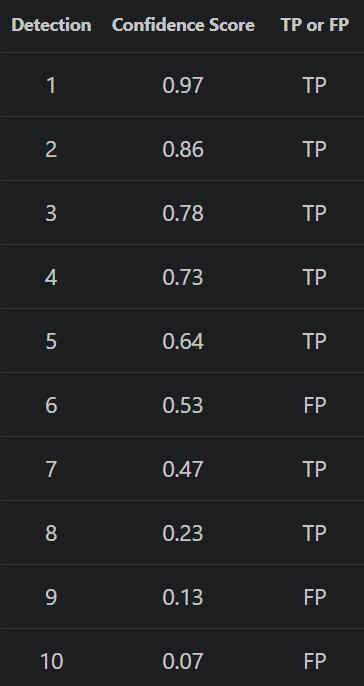

예를 들어 위와 같이 총 15개의 object가 있는 그림에서 10개의 object를 위와 같이 찾았다고 가정을 하겠다.

객체 검출의 결과로 Confidence Score를 출력하는데, Threshold 0.5를 기준으로 TP와 FP를 결정했다. 여기서 TP = 7, FP = 3이다. FN(False Negative)의 경우 15개의 Positive GT가 존재하는데 7개의 TP가 결정되었으므로 FN = 8이다. TP와 FN의 합이 GT의 수와 같다.

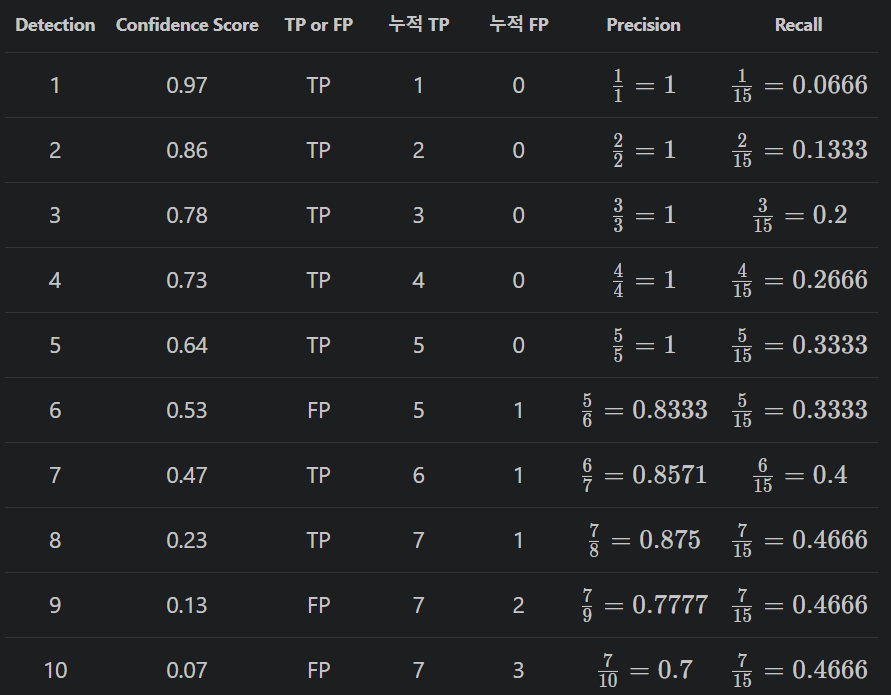

최종적으로 Precision & Recall Curve를 계산하면 위와 같이 된다.

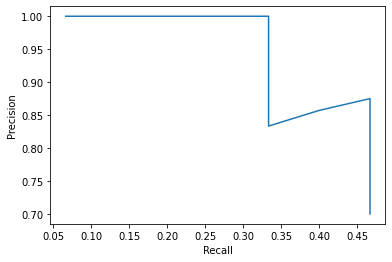

In [4]:
import matplotlib.pyplot as plt

TOTAL_DATASET = 15

tps = [1, 2, 3, 4, 5, 5, 6, 7, 7, 7]
fps = [0, 0, 0, 0, 0, 1, 1, 1, 2, 3]

precisions = []
recalls = []
for i, (tp, fp) in enumerate(zip(tps, fps), 1):
    precision = tp / i
    recall = tp / TOTAL_DATASET

    precisions.append(precision)
    recalls.append(recall)

plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## **AP & mAP**

다만 위의 Precision & Recall Curve의 그래프를 보면 면적을 계산하기 불편하게 되어있다. 따라서 일반적으로 계산의 편의를 위해 정밀도의 값을 보간(Interpolation)한다. 상대적으로 높은 재현율에서 정밀도가 더 높다면, 높은 정밀도의 수치로 보간하는 방법이다.

In [ ]:
precisions_rev = precisions[::-1]
precisions_inter = []
init_precision = precisions_rev[0]
precisions_inter.append(init_precision)
for i in range(len(precisions_rev) - 1):

    if not precisions_rev[i] > precisions_rev[i+1]:
        init_precision = precisions_rev[i+1]

    precisions_inter.append(init_precision)
precisions_inter = precisions_inter[::-1]



mAP는 데이터셋에 존재하는 개별 클래스에 대한 AP를 평균낸 값이다.

그런데 AP를 보다 보면 AP(50)와 같은 것을 볼 수 있다. 이는 앞서 설명한 내용에는 Confidence Score에 대해 Threshold를 적용하여 결과를 결정한다고 하였다. 하지만 위의 예제에서는 사용하지 않았다. 만약 Confidence Score가 우리가 정했던 Threshold보다 낮으면, 해당 출력은 신뢰도가 낮은 결과로 판단하여 결과로 인정하지 않는다. 즉 결과 데이터로 사용하지 않는다는 것이다.

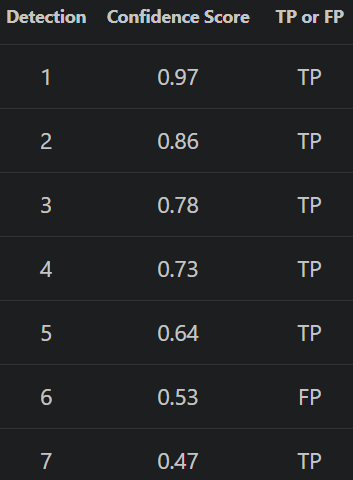

위의 그림은 앞서 우리가 사용한 결과 데이터에서 Threshold를 0.4로 잡은 결과다. 그림을 보면 알 수 있듯이 Confidence Score의 결과 중에서 0.4보다 낮은 값은 전부 무시된다.

Threshold를 적용하니 FP도 많이 줄었지만, TP도 같이 줄었다. 앞서 말했듯이 **Confidence Score는 객체 검출기가 스스로 판단한 신뢰 점수로 Confidence Score가 높다고 무조건 정답이 아니다.** 높은 확신으로 정답이라 판단했지만, 실제로는 틀린 경우가 있을 수 있다. 따라서 Threshold 값에 따라 검출기의 성능이 달라진다. 즉, AP(50)는 Threshold를 적용하고, Threshold의 값을 의미한다.

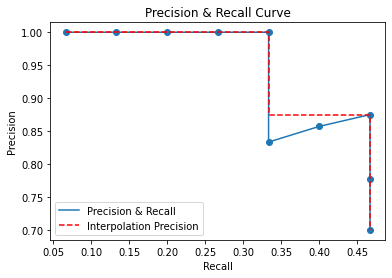

In [5]:
import matplotlib.pyplot as plt

TOTAL_DATASET = 15

tps = [1, 2, 3, 4, 5, 5, 6, 7, 7, 7]
fps = [0, 0, 0, 0, 0, 1, 1, 1, 2, 3]

precisions = []
recalls = []
for i, (tp, fp) in enumerate(zip(tps, fps), 1):
    precision = tp / i
    recall = tp / TOTAL_DATASET

    precisions.append(precision)
    recalls.append(recall)

precisions_rev = precisions[::-1]
precisions_inter = []
init_precision = precisions_rev[0]
precisions_inter.append(init_precision)
for i in range(len(precisions_rev) - 1):

    if not precisions_rev[i] > precisions_rev[i+1]:
        init_precision = precisions_rev[i+1]

    precisions_inter.append(init_precision)
precisions_inter = precisions_inter[::-1]


plt.plot(recalls, precisions, label='Precision & Recall')
plt.plot(recalls, precisions_inter, 'r--', label='Interpolation Precision')
plt.scatter(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision & Recall Curve')
plt.legend()
plt.show()